ID3 Decision Tree - VISHWANTH P 21MIS1117

Dataset : https://drive.google.com/file/d/1-6S5GwiqZYcBHXYxwvDanJ-Gd1O4o3Ul/view?usp=drive_link

In [220]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [222]:
df=pd.read_csv(r'C:\Users\Vishwanth Prakash\Desktop\21MIS1117\drug_dataset1.csv')

In [224]:
df.head()

,Patient ID,Age,Sex,BP,Cholesterol,Drug
0,p1,Young,F,High,Normal,Drug A
1,p2,Young,F,High,High,Drug A
2,p3,Middle-age,F,High,Normal,Drug B
3,p4,Senior,F,Normal,Normal,Drug B
4,p5,Senior,M,Low,Normal,Drug B


In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589 entries, 0 to 588
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Patient ID   589 non-null    object
 1   Age          589 non-null    object
 2   Sex          589 non-null    object
 3   BP           589 non-null    object
 4   Cholesterol  589 non-null    object
 5   Drug         589 non-null    object
dtypes: object(6)
memory usage: 27.7+ KB


In [228]:
df['Age'] = df['Age'].astype('category').cat.codes
df['Sex'] = df['Sex'].astype('category').cat.codes
df['BP'] = df['BP'].astype('category').cat.codes
df['Cholesterol'] = df['Cholesterol'].astype('category').cat.codes
df['Drug'] = df['Drug'].astype('category').cat.codes

In [230]:
feature_cols = ['Age', 'Sex', 'BP', 'Cholesterol']

In [232]:
def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    probabilities = counts / len(target_col)
    return -np.sum(probabilities * np.log2(probabilities + 1e-9))

# Calculate information gain
def information_gain(data, split_attr, target_attr):
    total_entropy = entropy(data[target_attr])
    values, counts = np.unique(data[split_attr], return_counts=True)
    
    weighted_entropy = 0
    for i in range(len(values)):
        subset = data[data[split_attr] == values[i]]
        weighted_entropy += (counts[i] / sum(counts)) * entropy(subset[target_attr])
    
    return total_entropy - weighted_entropy, total_entropy

In [234]:
X = df[['Age', 'Sex', 'BP', 'Cholesterol']]  # Independent variables
y = df['Drug']

In [236]:
print("\nFeature Entropy and Information Gain:")
for feature in X.columns:
    info_gain, total_entropy = information_gain(df, feature, 'Drug')
    print(f"{feature} - Entropy: {total_entropy:.3f}, Information Gain: {info_gain:.3f}")


Feature Entropy and Information Gain:
Age - Entropy: 0.981, Information Gain: 0.016
Sex - Entropy: 0.981, Information Gain: 0.008
BP - Entropy: 0.981, Information Gain: 0.005
Cholesterol - Entropy: 0.981, Information Gain: 0.002


In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [240]:
clf = DecisionTreeClassifier(criterion='entropy', random_state=40)
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=40)

In [242]:
y_pred = clf.predict(X_test)

In [244]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[25 21]
 [14 58]]


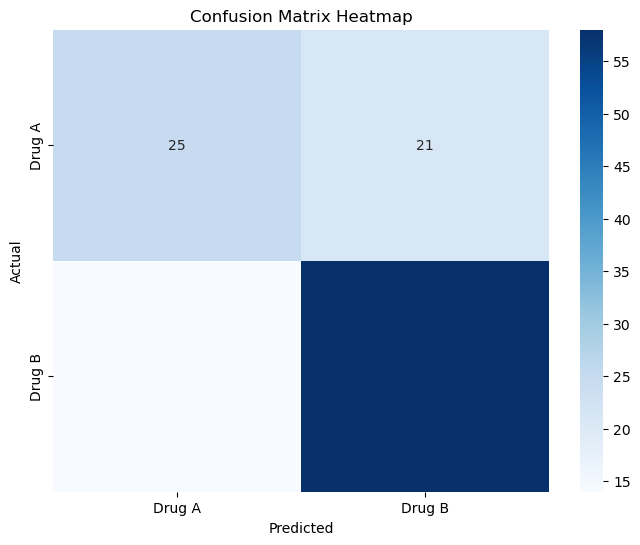

In [246]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Drug A', 'Drug B'], yticklabels=['Drug A', 'Drug B'])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [248]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")


Accuracy: 0.70


In [250]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.54      0.59        46
           1       0.73      0.81      0.77        72

    accuracy                           0.70       118
   macro avg       0.69      0.67      0.68       118
weighted avg       0.70      0.70      0.70       118



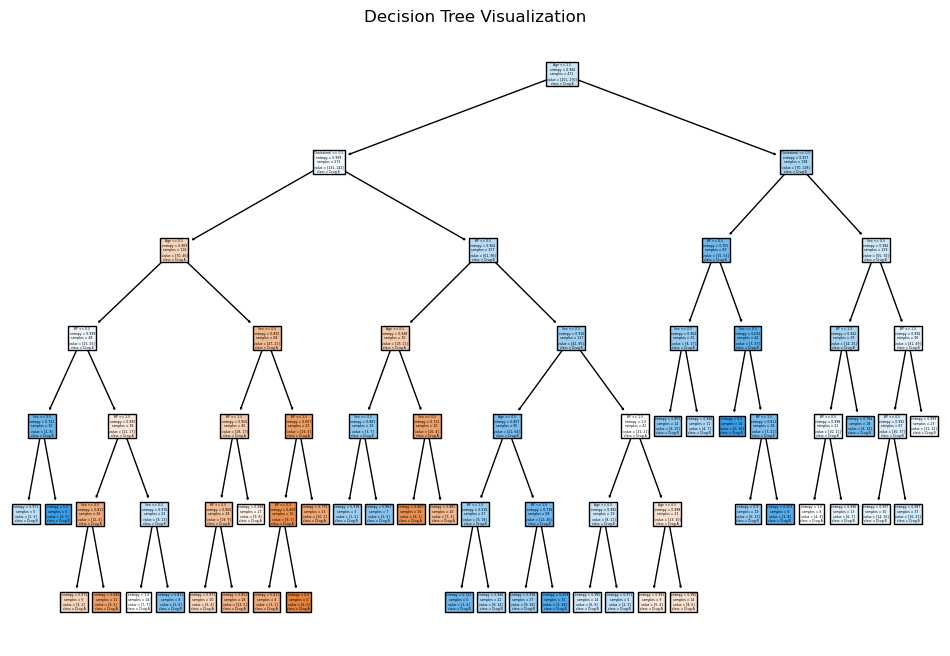

In [266]:
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=X.columns.tolist(), class_names=['Drug A', 'Drug B'])
plt.title("Decision Tree Visualization")
plt.show()

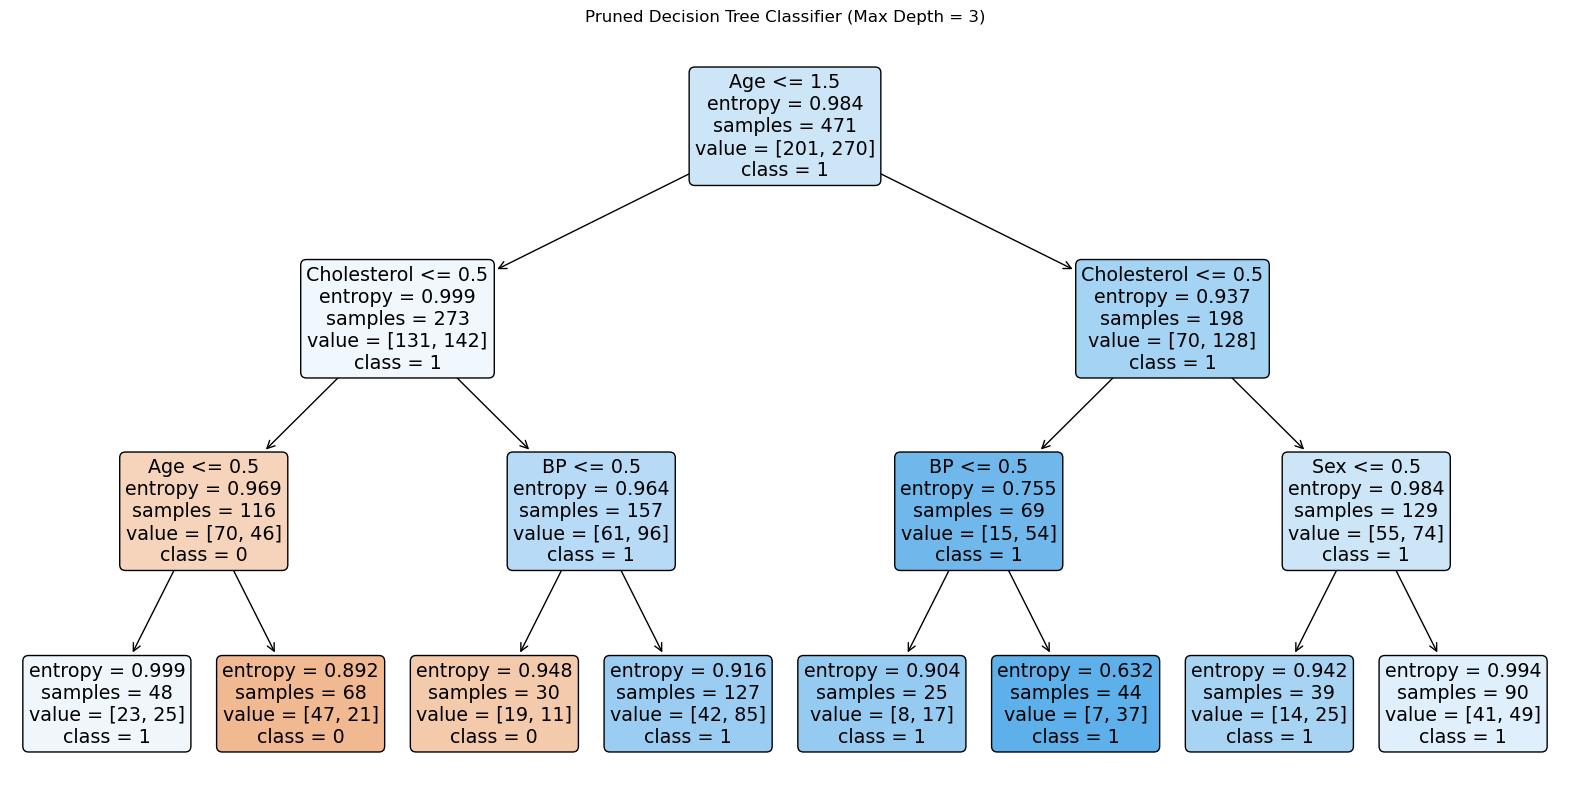

In [270]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Create and train a pruned Decision Tree classifier
pruned_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=3)
pruned_classifier.fit(X_train, y_train)

# Plot the pruned decision tree
plt.figure(figsize=(20,10))
plot_tree(pruned_classifier, 
          feature_names=feature_cols, 
          class_names=['0', '1'], 
          filled=True, 
          rounded=True)
plt.title("Pruned Decision Tree Classifier (Max Depth = 3)")
plt.show()


Inference:
The analysis indicates that while the decision tree can model the data with moderate accuracy, the information gain for the features is low, 
suggesting that these features may not be highly predictive of the drug type. 
The pruning of the tree is a good practice to prevent overfitting, as seen in the visualization of the pruned tree.